# Модель для предсказания наличия/отсутствия hypertension 


In [184]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [185]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ankushpanday1/hypertension-risk-prediction-dataset")

df = pd.read_csv(path+'/hypertension_dataset.csv')
df = df.drop(columns=['Cholesterol', 'Systolic_BP', 'Diastolic_BP', 'Smoking_Status', 'Alcohol_Intake', 'Family_History', 'Diabetes', 'Stress_Level', 'Salt_Intake', 'LDL', 'HDL', 'Triglycerides', 'Glucose', 'Education_Level', 'Employment_Status'])

In [186]:
df

,Country,Age,BMI,Physical_Activity_Level,Sleep_Duration,Heart_Rate,Gender,Hypertension
0,UK,58,29.5,Low,6.1,80,Female,High
1,Spain,34,36.2,High,9.8,56,Male,High
2,Indonesia,73,18.2,High,5.2,75,Male,Low
3,Canada,60,20.3,Moderate,7.5,71,Female,High
4,France,73,21.8,Moderate,5.0,52,Female,High
...,...,...,...,...,...,...,...,...
174977,India,51,39.4,Low,9.5,96,Female,Low
174978,Australia,89,39.0,Moderate,6.2,63,Female,High
174979,India,43,36.5,Low,10.0,62,Male,High
174980,Germany,48,18.3,High,4.7,53,Male,High


In [187]:
# Получить все уникальные значения из колонки Physical_Activity_Level (до энкодинга)
unique_physical_activity_levels = df['Physical_Activity_Level'].unique()
print(unique_physical_activity_levels)

['Low' 'High' 'Moderate']


In [188]:
df.describe()

,Age,BMI,Sleep_Duration,Heart_Rate
count,174982.000000,174982.000000,174982.000000,174982.000000
mean,53.493319,27.494672,6.996468,74.495085
std,20.786353,7.213866,1.730731,14.438573
min,18.000000,15.000000,4.000000,50.000000
25%,36.000000,21.200000,5.500000,62.000000
50%,54.000000,27.500000,7.000000,74.000000
75%,71.000000,33.700000,8.500000,87.000000
max,89.000000,40.000000,10.000000,99.000000


In [189]:
physical_activity_level_encoder = preprocessing.LabelEncoder()
hypertension_encoder = preprocessing.LabelEncoder()
gender_encoder = preprocessing.LabelEncoder()
country_encoder = preprocessing.LabelEncoder()


df['Physical_Activity_Level'] = physical_activity_level_encoder.fit_transform(df['Physical_Activity_Level'])
df['Hypertension'] = hypertension_encoder.fit_transform(df['Hypertension'])
df['Gender'] = gender_encoder.fit_transform(df['Gender'])
df['Country'] = country_encoder.fit_transform(df['Country'])

df.head()



,Country,Age,BMI,Physical_Activity_Level,Sleep_Duration,Heart_Rate,Gender,Hypertension
0,18,58,29.5,1,6.1,80,0,0
1,16,34,36.2,0,9.8,56,1,0
2,8,73,18.2,0,5.2,75,1,1
3,3,60,20.3,2,7.5,71,0,0
4,5,73,21.8,2,5.0,52,0,0


In [190]:
# # Outlier Removal
# num_col = ['Age', 'BMI', 'Sleep_Duration',
#            'Heart_Rate']

# Q1 = df[num_col].quantile(0.25)
# Q3 = df[num_col].quantile(0.75)
# IQR = Q3 - Q1

# df = df[~((df[num_col] < (Q1 - 1.5 * IQR)) | (df[num_col] > (Q3 + 1.5 * IQR))).any(axis=1)]


# Prediction time!

In [191]:
from sklearn.model_selection import train_test_split

# Prepare the data

In [192]:
# Prepare the data
X = df.drop(['Hypertension'], axis=1)
y = df['Hypertension']

# Split the data into train and test sets

In [193]:
X

,Country,Age,BMI,Physical_Activity_Level,Sleep_Duration,Heart_Rate,Gender
0,18,58,29.5,1,6.1,80,0
1,16,34,36.2,0,9.8,56,1
2,8,73,18.2,0,5.2,75,1
3,3,60,20.3,2,7.5,71,0
4,5,73,21.8,2,5.0,52,0
...,...,...,...,...,...,...,...
174977,7,51,39.4,1,9.5,96,0
174978,1,89,39.0,2,6.2,63,0
174979,7,43,36.5,1,10.0,62,1
174980,6,48,18.3,0,4.7,53,1


In [194]:
y

0         0
1         0
2         1
3         0
4         0
         ..
174977    1
174978    0
174979    0
174980    0
174981    0
Name: Hypertension, Length: 174982, dtype: int64

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Create a pipeline

In [196]:
# Модель логистической регрессии с масштабированием признаков

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor


logreg_pipeline = Pipeline([
    # ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier())
])

logreg_pipeline.fit(X_train, y_train)
y_pred_logreg = logreg_pipeline.predict(X_test)

KeyboardInterrupt: 

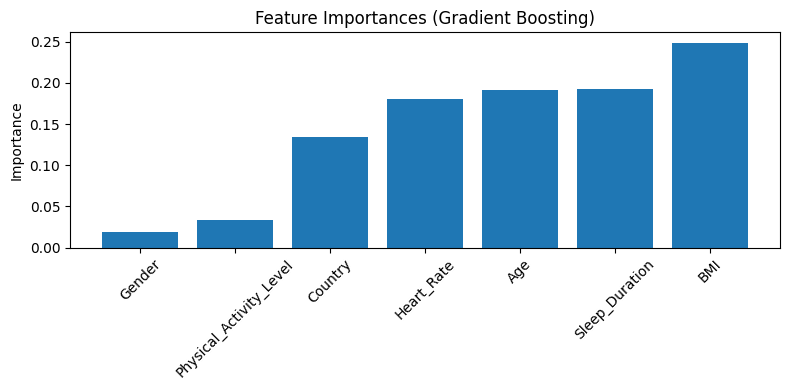

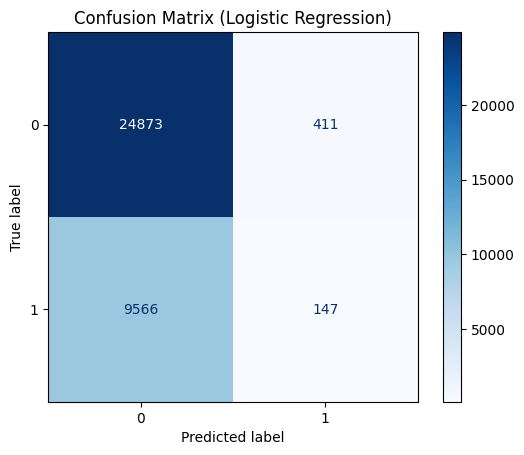

Accuracy : 0.715
Precision: 0.595
Recall   : 0.715
F1-score : 0.610

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.98      0.83     25284
           1       0.26      0.02      0.03      9713

    accuracy                           0.71     34997
   macro avg       0.49      0.50      0.43     34997
weighted avg       0.59      0.71      0.61     34997



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Визуализация весов параметров логистической регрессии
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

# Получаем важности признаков для GradientBoostingClassifier
importances = logreg_pipeline.named_steps['clf'].feature_importances_
feature_names = X.columns


sorted_idx = np.argsort(importances)
plt.figure(figsize=(8, 4))
plt.bar(np.array(feature_names)[sorted_idx], importances[sorted_idx])
plt.title('Feature Importances (Gradient Boosting)')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Матрица ошибок
cm = confusion_matrix(y_test, y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()


acc   = accuracy_score(y_test, y_pred_logreg)
prec  = precision_score(y_test, y_pred_logreg, average='weighted', zero_division=0)
rec   = recall_score(y_test, y_pred_logreg, average='weighted', zero_division=0)
f1    = f1_score(y_test, y_pred_logreg, average='weighted', zero_division=0)

print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-score : {f1:.3f}\n")

# 3. Подробный отчёт по каждому классу
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

In [ ]:
# Генерация случайного тестового сэмпла по каждому признаку отдельно
country = np.random.randint(X['Country'].min(), X['Country'].max() + 1)
print(f"Country: {country}")

age = np.random.randint(X['Age'].min(), X['Age'].max() + 1)
print(f"Age: {age}")

bmi = np.random.uniform(X['BMI'].min(), X['BMI'].max())
print(f"BMI: {bmi:.2f}")

physical_activity = np.random.randint(X['Physical_Activity_Level'].min(), X['Physical_Activity_Level'].max() + 1)
print(f"Physical Activity Level: {physical_activity}")

sleep_duration = np.random.uniform(X['Sleep_Duration'].min(), X['Sleep_Duration'].max())
print(f"Sleep Duration (hours): {sleep_duration:.2f}")

heart_rate = np.random.randint(X['Heart_Rate'].min(), X['Heart_Rate'].max() + 1)
print(f"Heart Rate (bpm): {heart_rate}")

gender = np.random.randint(X['Gender'].min(), X['Gender'].max() + 1)
print(f"Gender (0=Female, 1=Male): {gender}")

# Собираем все параметры в массив для предсказания
sample = np.array([[country, age, bmi, physical_activity, sleep_duration, heart_rate, gender]])

# Предсказание
random_pred = logreg_pipeline.named_steps['clf'].predict(sample)
random_pred_text = hypertension_encoder.inverse_transform(random_pred)
print("Предсказание для случайных данных:", random_pred_text[0])

probas = logreg_pipeline.named_steps['clf'].predict_proba(sample)
for label, prob in zip(hypertension_encoder.classes_, probas[0]):
    print(f"{label}: {prob:.3f}")


Country: 12
Age: 23
BMI: 18.97
Physical Activity Level: 0
Sleep Duration (hours): 8.64
Heart Rate (bpm): 96
Gender (0=Female, 1=Male): 1
Предсказание для случайных данных: High
High: 0.800
Low: 0.200


In [ ]:
import pickle

# Сохраняем обученную модель и все энкодеры в один файл
with open('hypertension.pkl', 'wb') as f:
    pickle.dump({
        'model': logreg_pipeline,
        'hypertension_encoder': hypertension_encoder,
        'physical_activity_level_encoder': physical_activity_level_encoder,
        'gender_encoder': gender_encoder,
        'country_encoder': country_encoder
    }, f)


In [ ]:
import numpy as np
import json
import pickle

# Генерация случайных данных для прогноза на основе диапазонов из X
country = np.random.randint(X['Country'].min(), X['Country'].max() + 1)
age = np.random.randint(X['Age'].min(), X['Age'].max() + 1)
bmi = np.random.uniform(X['BMI'].min(), X['BMI'].max())
physical_activity = np.random.randint(X['Physical_Activity_Level'].min(), X['Physical_Activity_Level'].max() + 1)
sleep_duration = np.random.uniform(X['Sleep_Duration'].min(), X['Sleep_Duration'].max())
heart_rate = np.random.randint(X['Heart_Rate'].min(), X['Heart_Rate'].max() + 1)
gender = np.random.randint(X['Gender'].min(), X['Gender'].max() + 1)
features = [country, age, bmi, physical_activity, sleep_duration, heart_rate, gender]

print("Случайные входные данные для прогноза:")
print(f"Country: {country}")
print(f"Age: {age}")
print(f"BMI: {bmi:.2f}")
print(f"Physical Activity Level: {physical_activity}")
print(f"Sleep Duration: {sleep_duration:.2f}")
print(f"Heart Rate: {heart_rate}")
print(f"Gender: {gender}")
# Предсказание по сгенерированным данным с помощью текущей обученной модели
sample = np.array(features).reshape(1, -1)
probas = logreg_pipeline.named_steps['clf'].predict_proba(sample)[0]
class_labels = logreg_pipeline.named_steps['clf'].classes_
diagnosis_names = hypertension_encoder.inverse_transform(class_labels)
result = {diagnosis: float(prob) for diagnosis, prob in zip(diagnosis_names, probas)}

print("\nРезультат работы функции predict_sleep_disorder:")
print(result)
def predict_hypertension(country, age, bmi, physical_activity_level, sleep_duration, heart_rate, gender):
    """
    Предсказание наличия гипертонии по неэнкодированным входным данным.
    Возвращает вероятности классов в формате JSON.
    """
    # Загружаем модель и энкодеры из файла
    with open('hypertension.pkl', 'rb') as f:
        data = pickle.load(f)
        model = data['model']
        hypertension_encoder = data['hypertension_encoder']
        physical_activity_level_encoder = data['physical_activity_level_encoder']
        gender_encoder = data['gender_encoder']
        country_encoder = data['country_encoder']

    # Кодируем входные данные
    country_enc = country_encoder.transform([country])[0]
    physical_activity_enc = physical_activity_level_encoder.transform([physical_activity_level])[0]
    gender_enc = gender_encoder.transform([gender])[0]

    features = [country_enc, age, bmi, physical_activity_enc, sleep_duration, heart_rate, gender_enc]
    sample = np.array(features).reshape(1, -1)

    probas = model.named_steps['clf'].predict_proba(sample)[0]
    class_labels = model.named_steps['clf'].classes_
    diagnosis_names = hypertension_encoder.inverse_transform(class_labels)
    result = {diagnosis: float(prob) for diagnosis, prob in zip(diagnosis_names, probas)}
    return json.dumps(result, ensure_ascii=False)



Случайные входные данные для прогноза:
Country: 13
Age: 19
BMI: 19.47
Physical Activity Level: 0
Sleep Duration: 6.25
Heart Rate: 62
Gender: 0

Результат работы функции predict_sleep_disorder:
{'High': 0.84, 'Low': 0.16}


In [206]:
# Получаем уникальные значения для неэнкодированных признаков
# Для Country, Physical_Activity_Level и Gender используем inverse_transform

# Country
all_countries = country_encoder.classes_
country_sample = np.random.choice(all_countries)
country_sample = 'Russia'
print(f"Country: {country_sample}")

# Age
age_sample = np.random.randint(df['Age'].min(), df['Age'].max() + 1)
print(f"Age: {age_sample}")

# BMI
bmi_sample = np.random.uniform(df['BMI'].min(), df['BMI'].max())
print(f"BMI: {bmi_sample:.2f}")

# Physical_Activity_Level
all_activity_levels = physical_activity_level_encoder.classes_
activity_sample = np.random.choice(all_activity_levels)
print(f"Physical Activity Level: {activity_sample}")

# Sleep_Duration
sleep_sample = np.random.uniform(df['Sleep_Duration'].min(), df['Sleep_Duration'].max())
print(f"Sleep Duration: {sleep_sample:.2f}")

# Heart_Rate
heart_rate_sample = np.random.randint(df['Heart_Rate'].min(), df['Heart_Rate'].max() + 1)
print(f"Heart Rate: {heart_rate_sample}")

# Gender
gender_sample = np.random.choice(df['Gender'].map({0: 'Female', 1: 'Male'}))
print(f"Gender: {gender_sample}")

# Прогоняем через predict_hypertension
result_json = predict_hypertension(
    country_sample,
    age_sample,
    bmi_sample,
    activity_sample,
    sleep_sample,
    heart_rate_sample,
    gender_sample
)
print("\nРезультат работы predict_hypertension:")
print(result_json)

Country: Russia
Age: 29
BMI: 19.90
Physical Activity Level: High
Sleep Duration: 4.63
Heart Rate: 72
Gender: Female

Результат работы predict_hypertension:
{"High": 0.47, "Low": 0.53}
